In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import pandas as pd
import pandas.core.tools.datetimes as datetools
import datetime
from datetime import timedelta

import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose


In [11]:
df = pd.read_excel('/content/Wind Speed Data_CY 2011.xlsx', )
df.head()

,Wind speed data (M/S),Unnamed: 1
0,NaN,NaN
1,Date & Time Stamp,Speed at 75mtr
2,2011-01-01 00:00:00,2.669
3,2011-01-01 00:10:00,2.965
4,2011-01-01 00:20:00,2.939


In [13]:
dataset = df.iloc[:,1].values

TypeError: 'value' must be an instance of str or bytes, not a float

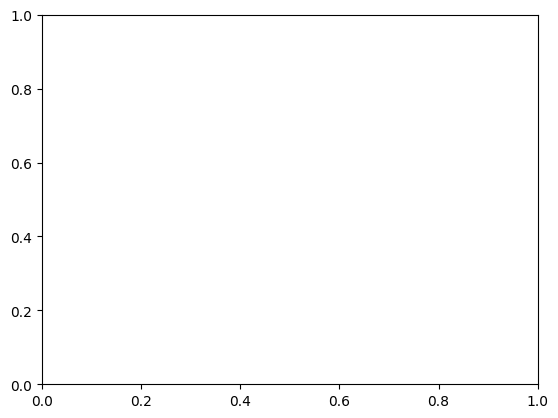

In [14]:
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("Speed at 75 mtr")
plt.title("Wind speed data")
plt.show()


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA


In [18]:
data = pd.read_excel('/content/Wind Speed Data_CY 2011.xlsx', skiprows=2)
data.columns = ['Date & Time Stamp', 'Speed at 75mtr']
data.dropna(inplace=True)
data['Date & Time Stamp'] = pd.to_datetime(data['Date & Time Stamp'])
data.set_index('Date & Time Stamp', inplace=True)

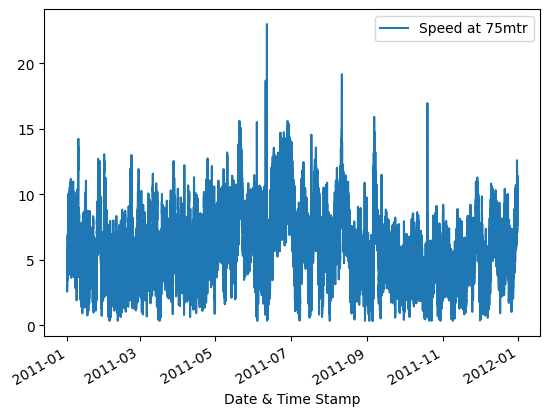

In [19]:
data.plot()
plt.show()

In [20]:
sarima_model = SARIMAX(data['Speed at 75mtr'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()
print(sarima_result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                     Speed at 75mtr   No. Observations:                52548
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -49427.596
Date:                            Tue, 04 Jun 2024   AIC                          98865.191
Time:                                    10:34:07   BIC                          98909.538
Sample:                                         0   HQIC                         98879.051
                                          - 52548                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6741      0.007     91.806      0.000       0.660       0.688
ma.L1         -0.8020      0.006   

In [21]:
forecast = sarima_result.get_forecast(steps=24)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


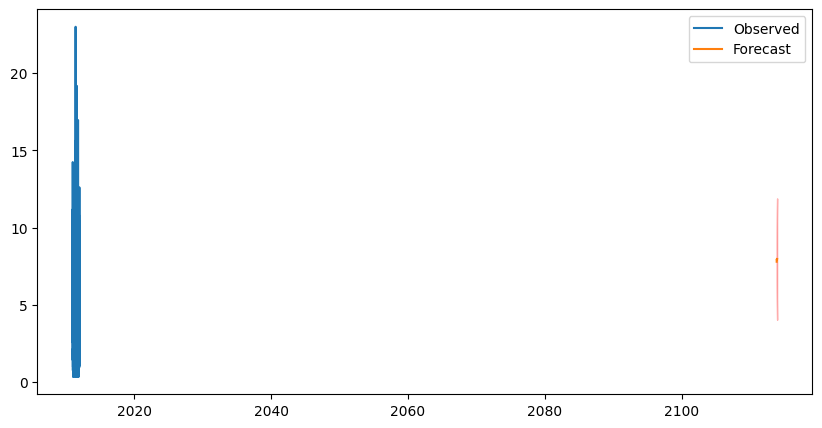

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Speed at 75mtr'], label='Observed')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='r', alpha=0.3)
plt.legend()
plt.show()

In [6]:
!pip install bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 8.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m